# Uncertianty Estimation

[Lecture Slides](https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/Lecture5_ConfidenceIntervals.pdf)
Feb 18, 2025

### Confidence interval: 
- it represents the percent of times that a value falls within a range ($x_{low}, x_{upper}$)

$Prob(x_- <= x <= x_=) = \int^+_-P(x)dx = C$

This required a symmetric interval around x. (this is fine if it's gaussian)
Often, C is in terms of σ or percent 50%, 90%, 95%, and 99%
There is a choice as follows:
1. Require symmetric interval (x+ and x- are equidistant from μ).
2. Require the shortest interval (x+ to x- is a minimum).
3. Require a central interval (integral from x- to μ is the same as from μ to x+).

### Data driven approach to fine uncertainty of parameters.    

1. Take the log likelihood (about it's max) and expand it with a taylor series. 
2. As we move .5 units of log likelihood away from the maximum, then all of the values within this range are within out 1 $\sigma$.

$lnL(\theta)=lnL_{max}-\frac{(\theta - \hat{\theta})^2}{2 \sigma^2_{\theta}}$

* this works only for PDFs that are Gaussian and the .5 value means that you are fitting one parameter. 

### Asymmetric Central Limits
So if you have an imbalanced curve (steep on one side and sloping on the other side)

What to do: Show the plot and let the reader interpret this.

### Parametric Bootstrapping (for non parametric PDF): 
1. Take a PDF (NORMALIZED), and find the best fit values via (ln(likelihood))
2. Then, using these "optimal" values, you sample from this probability distribution (here, I use MC rejection sampling) to generate a sample. 
3. Then, we fit the function to the sampled data and we record the alpha and beta values from the fit. 
4. Then, we plot the histogram to see what we have. And we generate the uncertainties for each variable by "integrating" the accumulation of alpha and beta values to teh 63% (what ever the exact 1 sigma percentage is. ) 


Nice things about this method:  
    * allows to you not calc covariance matrices, not need to calculate the degrees of freedom. 
    * doesn't have to satisfy Wilk's theorem or CLT. 


### Quick note on 1 $\sigma$ meaning: 
* It doesn't necessarily mean that it's from a gaussian distribution, it just means 68%. 

### Estimating uncertainty for multiple parameters:
* If you plot your likelihood in 2D, you'll get an ellipse of equal likelihood
* The current bounds are actually max and min in each parameter. 
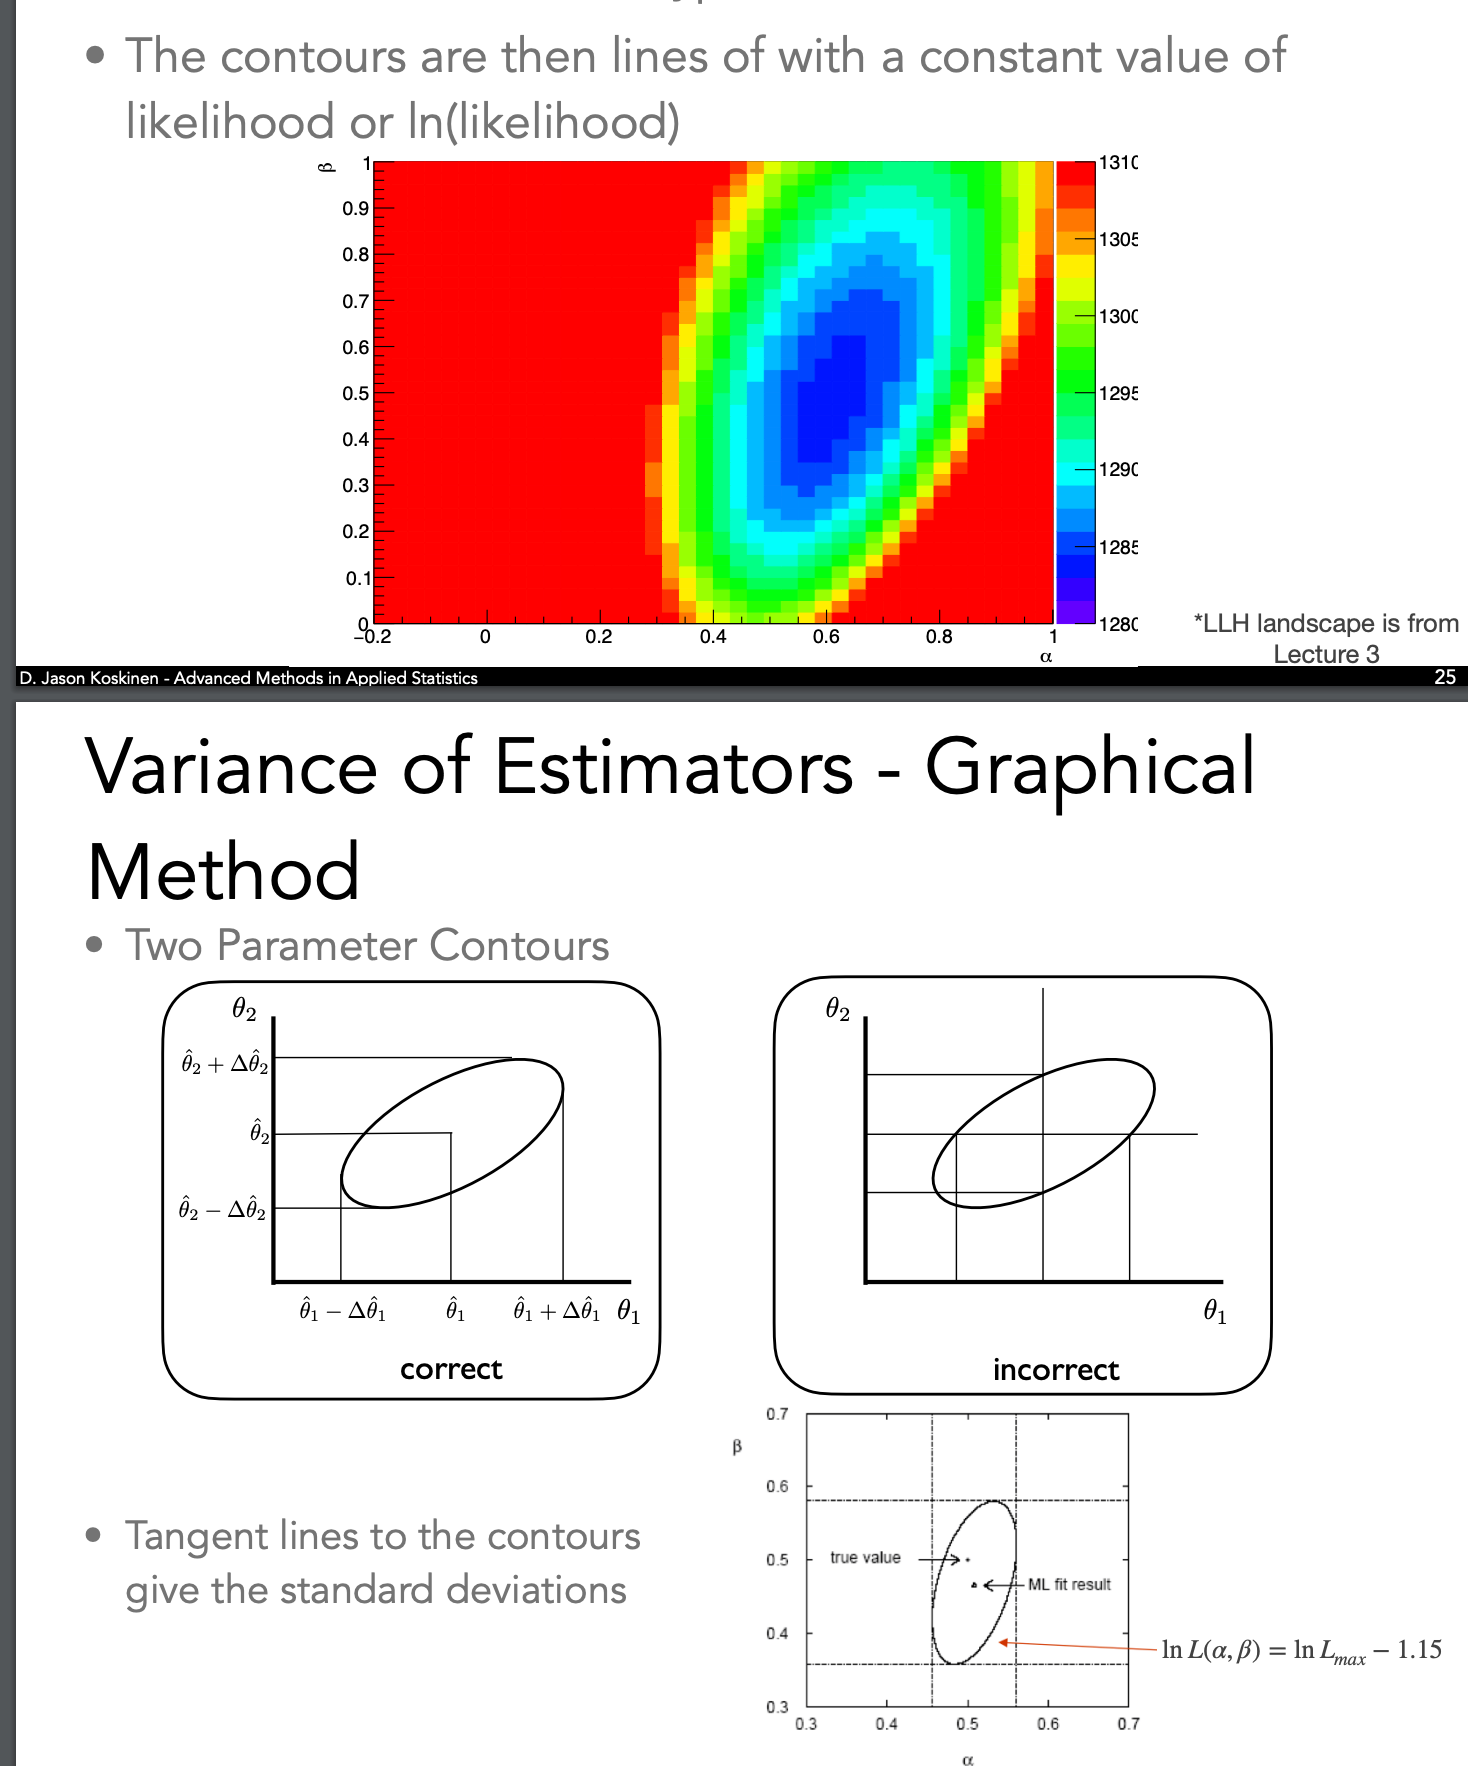

***Values to offset the Negative Log Likelihood by***
|  $\sigma$ | 1 DoF  |  2 DoF |  
|---|---|---|
|  1 | 0.5  |  1.15 |   
|   2|  2 | 3.09  |   
|   3|  4.5 |  5.92 |  


### Take aways: 
* You can not rescale your uncertainties such that the minimal $\chi^2% is a certain value. 

Questions: 
* what if you have more parameters? (you go 2.3 units away)
* what if you have a non gaussian or non parametric distribution?
* What is Wilk's Theorem? 
* check over the minimizer examples (because I haven't managed to get scipy optimizer yet...)
* what is the origin of the 1 $\sigma$ thing from gaussian distributions? 
* how are you describing the 2D ellipses in the likeklihood plots? It seems like you'd misrepressent the bounds if you just give rectungual bounds. and it would be quite complicated if you used ellipse equations. And how will the ratio between the misrepresented area and the number of dimensions change?   



Notes: 
* you can't just scale your 1 $\sigma$ to multiples to get other sigma values. You have to calculate them. 
* you can either analytically integrate your functions to normalize them and turn them into PDFs. Or you can use a numerical integration technique (like reiman, traps, ect)

# Exercise #1 Finding Uncertainties of a fit Using Best Fit and +- change in Likilhood

Use the function $$ f(x: \beta) = 1 + 0.65x +  \beta x^2 $$ 

* For data that has an unknown $\beta$, we want to get the best-fit
value of $\hat{\beta}$ from the data as well as the 1 sigma uncertainty .


* There are 3013 data points in a file for Exercise 1 on the course
webpage. The data points come from the above function
transformed into a PDF over the range -0.95 ≤ x ≤ 0.95.

* Remember to normalize the function properly to convert it to a
proper PDF


## Steps to calculate the uncertainty analytically:  
1. Fit the data by minimizing the negative log likelihood to get optimal parameter (beta)
2. Scoot the beta value to the left and right away from optimal point and calculate the negative log likelihood with these new beta values. 
3. Stop the "scooting" when the difference between the $NNL(\hat \beta)-NNL(\beta) = .5$ . Then you calculate ($(\hat \beta)-\beta$) the for the upper and lower bounds. 

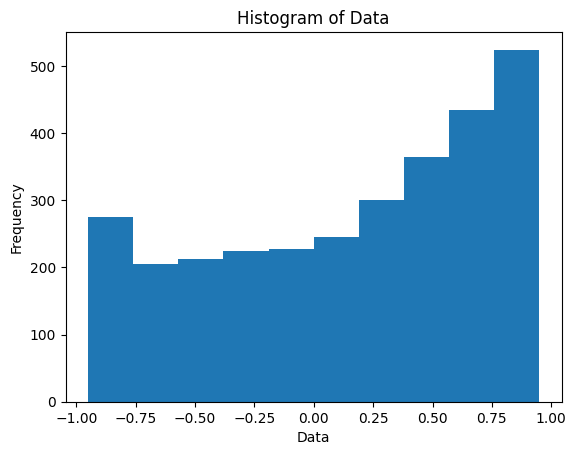

the min value of the data is:  -0.949764
the max value of the data is:  0.948882


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# load the data file: 

data = np.loadtxt('ParameterEstimation_Ex1.txt')
main_data = data

# plot the data:
plt.hist(data)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

print("the min value of the data is: ", np.min(data))
print("the max value of the data is: ", np.max(data))




In [2]:
"""
Hmmm, I've done something wrong. Others are getting 0.88. 
The issues were that I didn't enter in the exact correct bounds of the data and I also had a slightly incorrect analytical integration. 
"""

"\nHmmm, I've done something wrong. Others are getting 0.88. \nThe issues were that I didn't enter in the exact correct bounds of the data and I also had a slightly incorrect analytical integration. \n"

beta_hat = 0.8808808808808809, beta_upper = 0.980880880880881, beta_lower = 0.7898808808808808


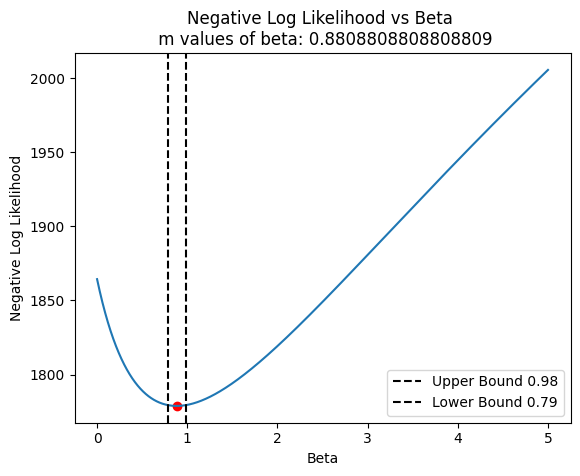

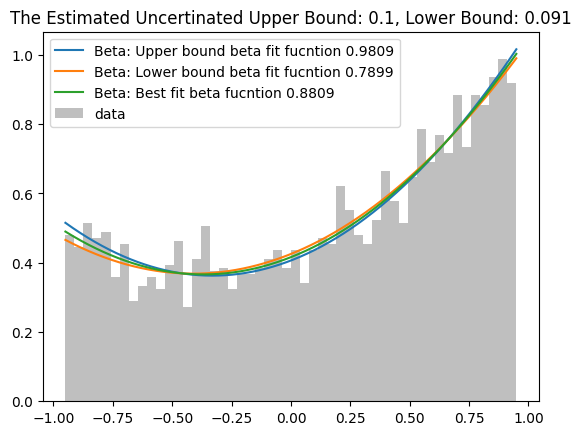

In [3]:
# So, first we want to write the function that we are fitting as a normalized probability distribution. 

# do we normalize within the interval of the data?

def normalized_fit_function(x, beta, alpha = 0.65, xmin = -0.95, xmax = 0.95):
    integral = lambda beta,alpha, x: x + alpha*x**2*.5 + beta*x**3/3
    C = 1/(integral(beta,alpha, xmax) - integral(beta,alpha, xmin))
    return (1 + alpha*x + beta*x**2)*C

def calc_neg_log_likelihood(data, beta, alpha= 0.65):
    return -np.sum(np.log(normalized_fit_function(data, beta,alpha)))


# next, slight to the left and right of the minimum to fo=ind our 1 sigma uncertainty bounds: 
def find_upper_lower_sigma(beta_hat, data, step = 0.01):
    # first find the upper bound:
    beta_upper = beta_hat
    beta_lower = beta_hat
    while np.abs(calc_neg_log_likelihood(data, beta_upper) - calc_neg_log_likelihood(data, beta_hat)) < 0.5:
        beta_upper += step
    while np.abs(calc_neg_log_likelihood(data, beta_hat) - calc_neg_log_likelihood(data, beta_lower)) < 0.5:
        beta_lower -= step
    return beta_upper, beta_lower


# now we will use the minimize function to find the best beta value.
# start with a line search: 
beta_values = np.linspace(0, 5, 1000)
neg_log_likelihood_values = np.zeros(len(beta_values))
for i in range(len(beta_values)):
    neg_log_likelihood_values[i] = calc_neg_log_likelihood(data, beta_values[i])


beta_hat = beta_values[np.argmin(neg_log_likelihood_values)]

beta_upper, beta_lower = find_upper_lower_sigma(beta_hat, data, step = 0.001)
print(f'beta_hat = {beta_hat}, beta_upper = {beta_upper}, beta_lower = {beta_lower}')


plt.plot(beta_values, neg_log_likelihood_values)
plt.xlabel('Beta')
plt.ylabel('Negative Log Likelihood')
plt.title(f'Negative Log Likelihood vs Beta \n m values of beta: {beta_values[np.argmin(neg_log_likelihood_values)]}')  
plt.scatter(beta_hat, np.min(neg_log_likelihood_values), color = 'red')
# add in the 1 sigma bounds:
plt.axvline(x = beta_upper, color = 'black', linestyle = '--', label = f"Upper Bound {np.round(beta_upper, 2)}")
plt.axvline(x = beta_lower, color = 'black', linestyle = '--', label = f"Lower Bound {np.round(beta_lower, 2)}")
plt.legend()
# 
plt.show()



x = np.linspace(np.min(data), np.max(data), 1000)
plt.plot(x, normalized_fit_function(x, beta_upper) , label = f"Beta: Upper bound beta fit fucntion {np.round(beta_upper, 4)}")
plt.plot(x, normalized_fit_function(x, beta_lower), label = f"Beta: Lower bound beta fit fucntion {np.round(beta_lower, 4)}")
plt.plot(x, normalized_fit_function(x, beta_hat), label = f"Beta: Best fit beta fucntion {np.round(beta_hat, 4)}")
plt.title(f"The Estimated Uncertinated Upper Bound: {np.round(beta_upper - beta_hat, 4)}, Lower Bound: {np.round( beta_hat - beta_lower, 4)}")

plt.hist(data, bins = 50, density = True, label = "data", color="grey", alpha = .5)
plt.legend()

# Exercise 2 -- Parametric Bootstrapping
$$
f(x; \alpha, \beta) = 1 + \alpha x + \beta x^2
$$
1. Find the maximum likelihood estimate (MLE) parameters for $\hat\alpha, \hat\beta$  for the data. 
2. Generate Samples from these distributions using the MC rejection technique. 

In [4]:

def calc_neg_log_likelihood(data, alpha= 0.65, beta = 1 ):
    return -np.sum(np.log(normalized_fit_function(data, beta,alpha)))


# next, slight to the left and right of the minimum to fo=ind our 1 sigma uncertainty bounds: 
def find_upper_lower_sigma(beta_hat, data, step = 0.01):
    # first find the upper bound:
    beta_upper = beta_hat
    beta_lower = beta_hat
    while np.abs(calc_neg_log_likelihood(data, beta_upper) - calc_neg_log_likelihood(data, beta_hat)) < 0.5:
        beta_upper += step
    while np.abs(calc_neg_log_likelihood(data, beta_hat) - calc_neg_log_likelihood(data, beta_lower)) < 0.5:
        beta_lower -= step
    return beta_upper, beta_lower


"""This is a SLOW version"""
# # now we will use the minimize function to find the best beta value.
# # start with a line search:
# print("Perform the First method of minimization:")
# n_beta = 1000
# n_alpha = 1000
# beta_values = np.linspace(0, 5, n_beta)
# alpha_values = np.linspace(0, 1, n_alpha)
# neg_log_likelihood_values = np.zeros((n_beta, n_alpha))
# for j in range(len(alpha_values)):
#     for i in range(len(beta_values)):
#         neg_log_likelihood_values[i, j] = calc_neg_log_likelihood(data, beta_values[i], alpha_values[j])

# plt.imshow(neg_log_likelihood_values, aspect='auto', origin='lower')
# plt.colorbar()

# # Find the min x, y values:
# min_index = np.unravel_index(np.argmin(neg_log_likelihood_values), neg_log_likelihood_values.shape)
# min_beta = beta_values[min_index[0]]
# min_alpha = alpha_values[min_index[1]]
# print(f"min beta: {min_beta}, min alpha: {min_alpha}")

# plt.scatter(min_index[0], min_index[1], color='red')
# plt.xlabel('Beta')
# plt.ylabel('Alpha')
# plt.title('Negative Log-Likelihood')
# plt.show()



'This is a SLOW version'

## Find alpha, beta hat, gen samples, and fit samples. 

Here, I show how to work with different data sets, multiple variables and the scipy.optimize minimize function. 

[0.64339272 0.87547352]


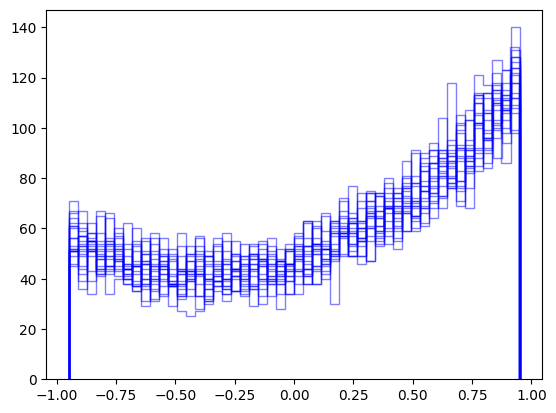

<Axes: title={'center': 'Histogram of Beta'}, xlabel='Beta', ylabel='Frequency'>

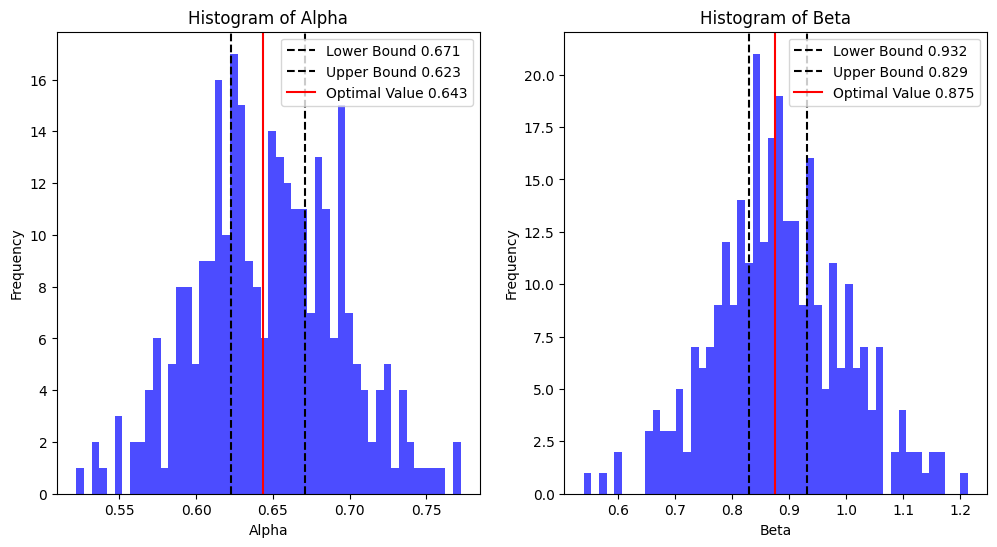

In [ ]:
from scipy.optimize import minimize
from functools import partial

def wrapped_nll(params, data):
    a, b = params  # Ensure a and b are scalars
    return calc_neg_log_likelihood(data, a, b)

# find the alpha and beta values that minimize the negative log likelihood using a minimizer package: 
initial_guess = [0.5, 0.5]
res = minimize(wrapped_nll, initial_guess,args=(main_data,),)
print(res.x)    
alpha_hat, beta_hat = res.x

def parametric_bootstrap(x_values, beta_hat, alpha_hat, n_samples = 3000, n_repeats = 300):
    """Sample our distribution with the parameters alpha, and beta given by the minumun likelihood. 
    We use then MC method to obtain our samples. """
    max_y_value = np.max(normalized_fit_function(x_values, beta_hat, alpha_hat))
    all_data_samples = []
    for i in range(n_repeats):
        # do a MC approach to generate samples from the alpha, beta hat distributions
        sample_count = 0
        data_samples = np.zeros(n_samples)
        while sample_count < n_samples:
            x = np.random.uniform(-0.95, 0.95)
            y = np.random.uniform(0, max_y_value)   
            if y < normalized_fit_function(x, beta_hat, alpha_hat):
                data_samples[sample_count] = x
                sample_count += 1
        all_data_samples.append(data_samples)
    return all_data_samples


# find the max y value, for the function given the x range. 
x_values = np.linspace(-0.95, 0.95, 1000)


# Run the MC approach to generate samples from the alpha, beta hat distributions
n_samples = 3000
n_repeats = 300
all_data_samples = parametric_bootstrap(x_values, beta_hat, alpha_hat, n_samples = 3000, n_repeats = 300)
# plot an example of the data samples:
for i in range(20):
    plt.hist(all_data_samples[i], bins = 50, alpha = 0.5, color = 'blue', histtype="step")
plt.show()



# Fit the samples to the model and plot the alpha and beta values
# Define reasonable bounds for parameters a and b
bounds = [(0, 1), (0, 2)]  # Adjust based on your problem
beta_values = []
alpha_values = []
for i, data in enumerate(all_data_samples):
    initial_guess = [0.5, 0.5]
    res = minimize(wrapped_nll, initial_guess, args=(data,), bounds=bounds)
    alpha_values.append(res.x[0])
    beta_values.append(res.x[1])

def plot_histogram_with_bounds(values, opt_value, confidence=0.68, bins=50, xlabel='Value', ylabel='Frequency', title='Histogram', ax = None):
    """
    Plots a histogram of the given values and marks the confidence interval bounds.
    
    Parameters:
    values (array-like): Data values to plot.
    confidence (float): Confidence level (default 0.68 for 68% interval).
    bins (int): Number of bins in the histogram (default 50).
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    title (str): Title of the plot.
    """
    values = np.sort(values)
    n_samples = len(values)
    n_sigma = int(n_samples * confidence)
    lower_bound = values[n_sigma]
    upper_bound = values[-n_sigma]

    if ax is None:
        fig, ax = plt.subplots()
    else: 
        ax.hist(values, bins=bins, alpha=0.7, color='blue')
        ax.axvline(x=lower_bound, color='black', linestyle='--', label=f"Lower Bound {np.round(lower_bound, 3)}")
        ax.axvline(x=upper_bound, color='black', linestyle='--', label=f"Upper Bound {np.round(upper_bound, 3)}")
        ax.axvline(x=opt_value, color='red', linestyle='-', label=f"Optimal Value {np.round(opt_value, 3)}")
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        return ax
    
# make a subplot with 2 figures:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram_with_bounds(alpha_values, alpha_hat, xlabel='Alpha', title='Histogram of Alpha', ax = ax1)
plot_histogram_with_bounds(beta_values, beta_hat, xlabel='Beta', title='Histogram of Beta', ax = ax2)


# plt.scatter(alpha_values, beta_values)
# plt.xlabel('Alpha')
# plt.ylabel('Beta')
# plt.title('Alpha vs Beta')
# plt.show()

# # plot the individual histograms and the scatterplot of the two values; 
# alpha_values = np.sort(alpha_values)
# n_samples = len(alpha_values)
# n_sigma_1 = int(n_samples*0.68)
# lower_bound = alpha_values[n_sigma_1]
# upper_bound = alpha_values[-n_sigma_1]
# plt.hist(alpha_values, bins = 50)
# plt.axvline(x = lower_bound, color = 'black', linestyle = '--', label = f"Lower Bound {np.round(lower_bound, 2)}")
# plt.axvline(x = upper_bound, color = 'black', linestyle = '--', label = f"Upper Bound {np.round(upper_bound, 2)}")
# plt.xlabel('Alpha')
# plt.ylabel('Frequency')
# plt.title('Histogram of Alpha')
# plt.show()

# plt.hist(beta_values, bins = 50)
# plt.xlabel('Beta')
# plt.ylabel('Frequency')
# plt.title('Histogram of Beta')
# plt.show()




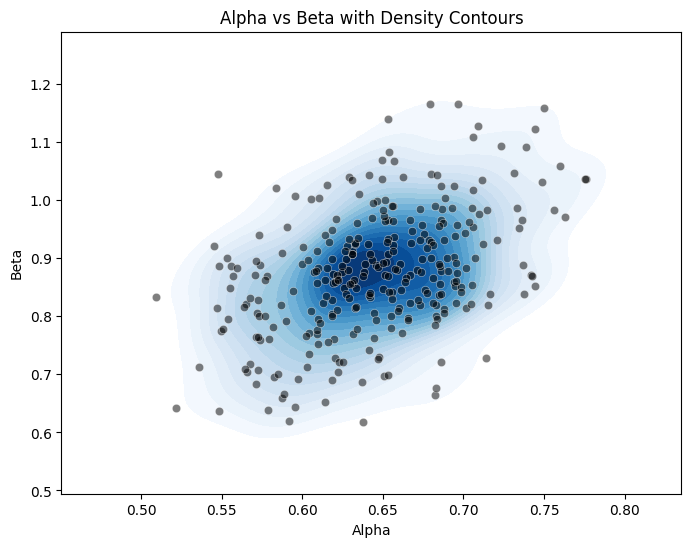

In [19]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Alpha': alpha_values, 'Beta': beta_values})

# Scatter plot with density contours
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Alpha', y='Beta', fill=True, cmap='Blues', levels=20)
sns.scatterplot(data=df, x='Alpha', y='Beta', color='black', alpha=0.5)
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Alpha vs Beta with Density Contours')
plt.show()

## Exercise #2d
Using the same function as Exercise #2a, find the MLE
values for the data in the file using the function
* Plot the uncertainty contours related to the 1σ, 2σ, and 3σ confidence regions from the
* Remember that this function has 2 fit parameters


**Solution Steps**
So, I think we could do it 2 ways: 
1. we could calculate the NNL (which we obtain through testing a given alpha and beta parameter set, in), and then perturb the values until the NLL dips to certian values. 
2. We could do 

In [57]:

# -------------------Calculate the Negative Log-Likelihood-------------------
def calc_neg_log_likelihood_matrix(data, alpha_value_range, beta_value_range):
    n_alpha = len(alpha_value_range)
    n_beta = len(beta_value_range)
    nn_L = np.zeros((n_alpha, n_beta))
    for ai, a in enumerate(alpha_value_range):
        for bi, b in enumerate(beta_value_range):
            nn_L[ai][bi] = calc_neg_log_likelihood(data, a, b)
    return nn_L


# -------------------Define the Sigma (distance from NNL min) ranges for 1D plot-------------------
n_alpha = 500
n_beta = 500
alpha_min, alpha_max = 0.4, .8
beta_min, beta_max = 0.4, 1.5
beta_value_range = np.linspace(beta_min, beta_max, n_beta)
alpha_value_range = np.linspace(alpha_min, alpha_max, n_alpha)

nn_L = calc_neg_log_likelihood_matrix(data, alpha_value_range, beta_value_range)    


  

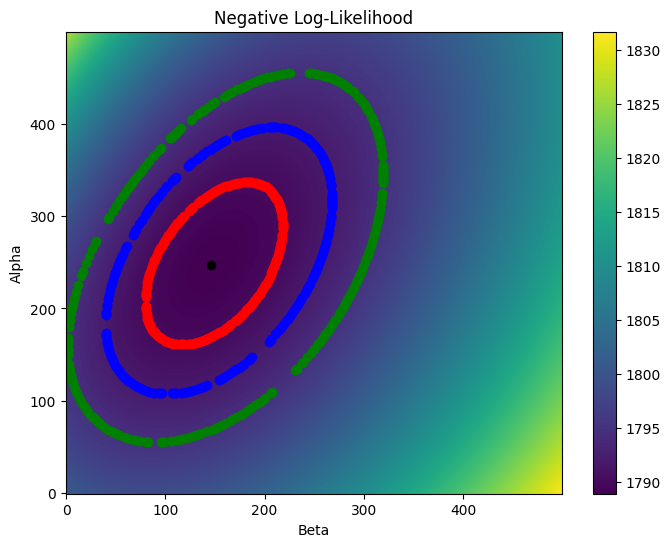

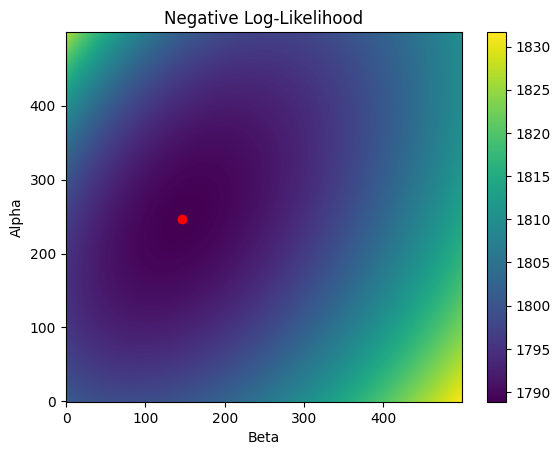

In [58]:
      
        
# -------------------Plot the 2D Negative Log-Likelihood-------------------
plt.figure(figsize=(8, 6))
plt.imshow(nn_L, aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Negative Log-Likelihood')

# -------------------Find the minimum NNL value and its corresponding alpha and beta values-------------------
min_index = np.unravel_index(np.argmin(nn_L), nn_L.shape)
min_alpha = alpha_value_range[min_index[0]]
min_beta = beta_value_range[min_index[1]]

# -------------------Find the values that are on the contour-------------------
def find_contour_values(nn_L, min_index, sigma):
    
    min_value = nn_L[min_index]
    contour_values = []
    for i in range(nn_L.shape[0]):
        for j in range(nn_L.shape[1]):
            if np.isclose(np.abs(nn_L[i][j] - min_value), sigma, atol=0.01):
                contour_values.append((i, j))
    return contour_values

# -------------------Define the Sigma (distance from NNL min) ranges for 2D plot-------------------
sigma_1 = 1.15
sigma_2 = 3.09 
sigma_3 = 5.92

colors = ['red', 'blue', 'green']
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    contour_values = find_contour_values(nn_L, min_index, sigma)
    for value in contour_values:
        plt.scatter(value[1], value[0], color=colors[i], label=f'{sigma} sigma')

plt.scatter(min_index[1], min_index[0], color='black')

plt.show()

plt.scatter(min_index[1], min_index[0], color='red')
plt.imshow(nn_L, aspect='auto', origin='lower')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Negative Log-Likelihood')
plt.colorbar()
plt.show()




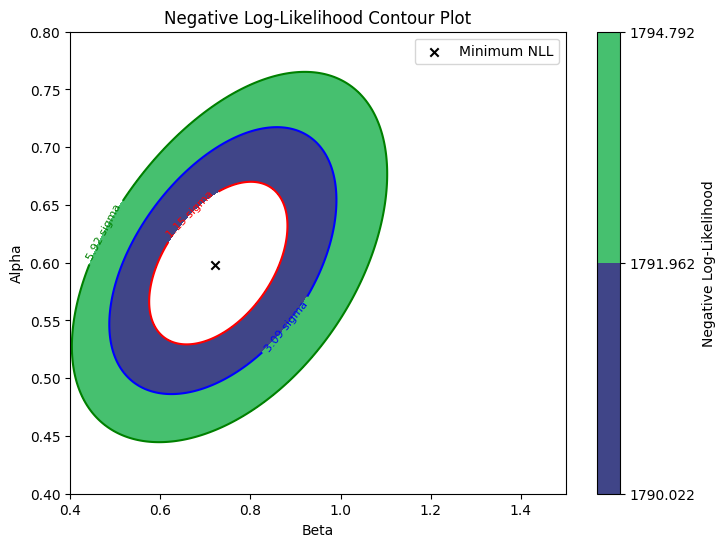

In [59]:
def plot_contour_plot(alpha_value_range, beta_value_range, nn_L, sigma_1, sigma_2, sigma_3):

    # Find the minimum NLL value and corresponding alpha and beta values
    min_index = np.unravel_index(np.argmin(nn_L), nn_L.shape)
    min_alpha = alpha_value_range[min_index[0]]
    min_beta = beta_value_range[min_index[1]]


    sigma_levels = [nn_L[min_index] + sigma_1, nn_L[min_index] + sigma_2, nn_L[min_index] + sigma_3]
    colors = ['red', 'blue', 'green']
    labels = [f'{sigma_1} sigma', f'{sigma_2} sigma', f'{sigma_3} sigma']

    # Plot the filled contour
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(beta_value_range, alpha_value_range, nn_L, levels=sigma_levels, cmap='viridis')
    cbar = plt.colorbar(label='Negative Log-Likelihood')
    plt.xlabel('Beta')
    plt.ylabel('Alpha')
    plt.title('Negative Log-Likelihood Contour Plot')

    # Overlay contour lines for sigma levels
    contour_lines = plt.contour(beta_value_range, alpha_value_range, nn_L, levels=sigma_levels, colors=colors)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt={lvl: lbl for lvl, lbl in zip(sigma_levels, labels)})

    # Mark the minimum NLL point
    plt.scatter(min_beta, min_alpha, color='black', marker='x', label='Minimum NLL')
    plt.legend()
    plt.show()

plot_contour_plot(alpha_value_range, beta_value_range, nn_L, sigma_1, sigma_2, sigma_3)

## Exercise 3: 
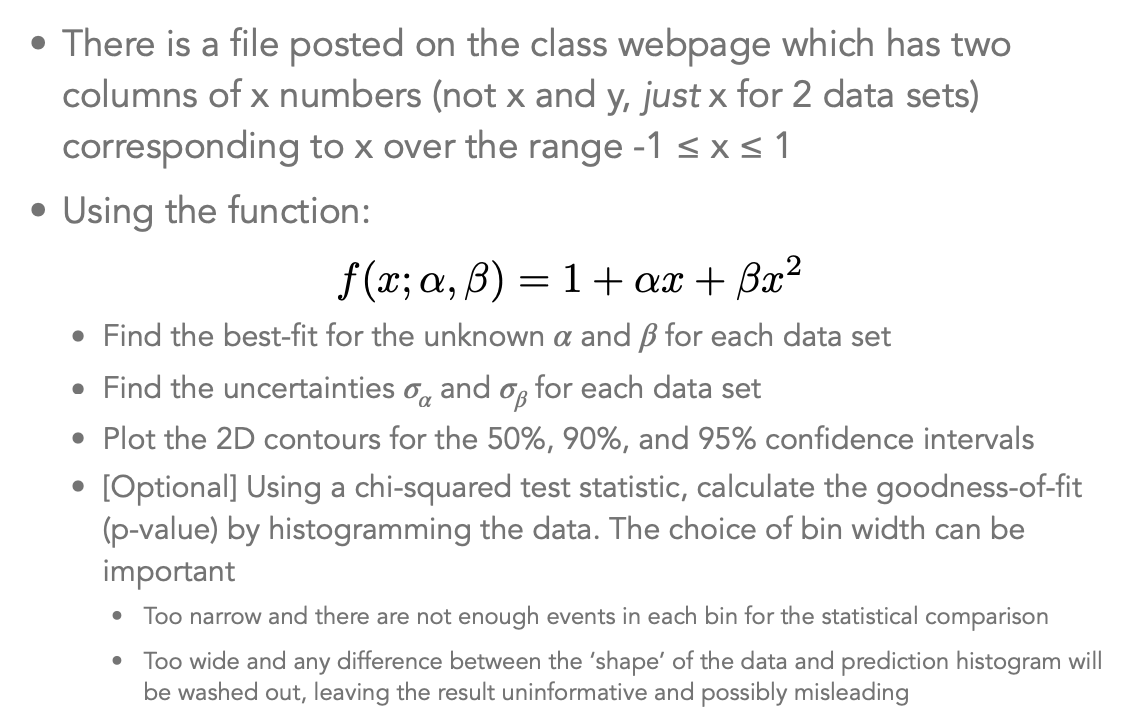

***Solution***
So, we can find our best fit through minimizing the likelihood, and we can also use the parametric boostrapping method. Here, I think we'd want to use the parametric bootstrapping technique since we are asked about the n% confidence intervals. 

Best fit values for extra data set 1:
Alpha: 0.505033286631593, Beta: 1.2091957046144937
Best fit values for extra data set 2:
Alpha: 0.07968683006695221, Beta: 1.2352730216664907


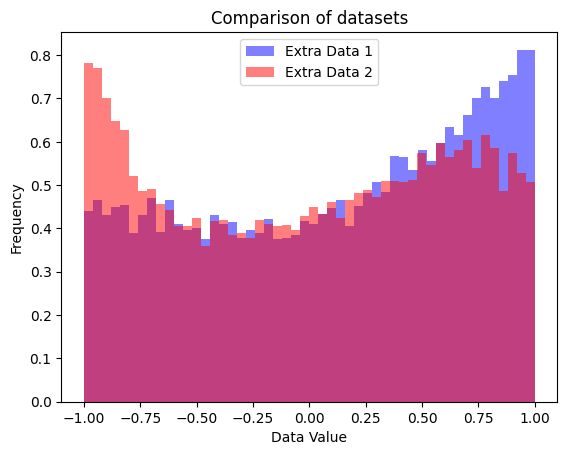

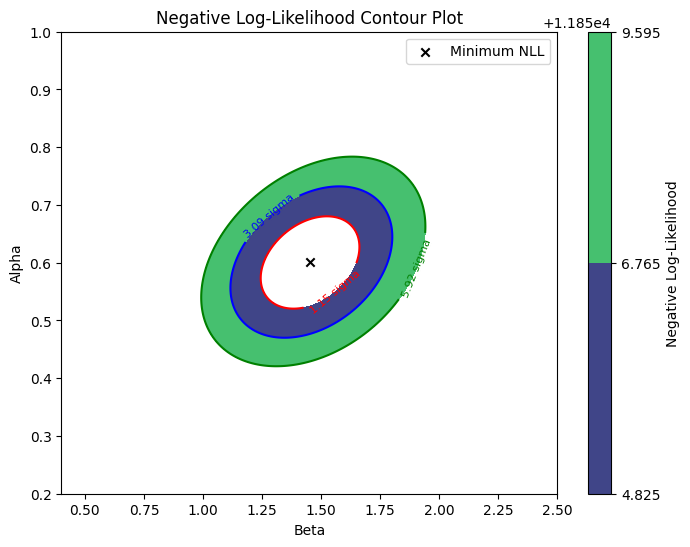

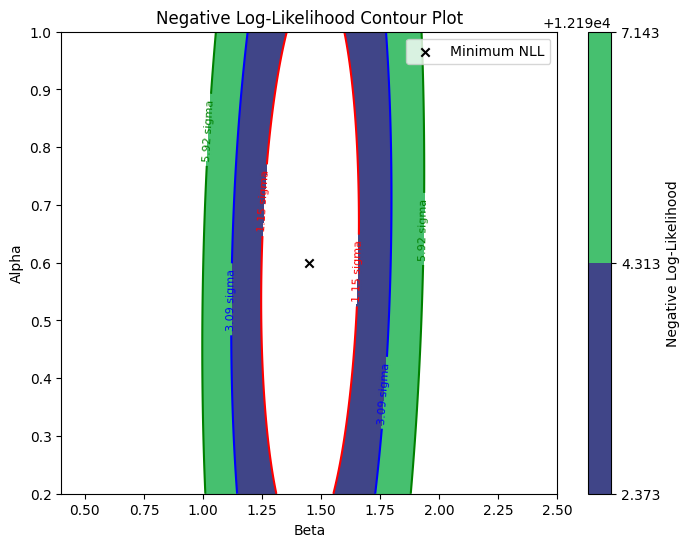

In [66]:
extra_data = np.loadtxt('MLE_Variance_data_2.txt')
# seperate the two datasets 
extra_data_1 = extra_data[:,0]
extra_data_2 = extra_data[:,1]

# -------- Find the best fit values for the extra data set 1 and 2-------------------
# Find the best fit values for the extra data set 1
initial_guess = [0.5, 0.5]
res = minimize(wrapped_nll, initial_guess, args=(extra_data_1,), bounds=bounds)
alpha_hat_1, beta_hat_1 = res.x

res = minimize(wrapped_nll, initial_guess, args=(extra_data_2,), bounds=bounds)
alpha_hat_2, beta_hat_2 = res.x

print("Best fit values for extra data set 1:")
print(f"Alpha: {alpha_hat_1}, Beta: {beta_hat_1}")
print("Best fit values for extra data set 2:")
print(f"Alpha: {alpha_hat_2}, Beta: {beta_hat_2}")

plt.hist(extra_data_1, bins=50, density=True, alpha=0.5, label='Extra Data 1', color='blue')
plt.hist(extra_data_2, bins=50, density=True, alpha=0.5, label='Extra Data 2', color='red')
plt.title("Comparison of datasets")
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -------------------Calculate the Negative Log-Likelihood for the extra data sets-------------------
nn_L_extra_1 = np.zeros((n_alpha, n_beta))
nn_L_extra_2 = np.zeros((n_alpha, n_beta))

# -------------------Define the Sigma (distance from NNL min) ranges for 2D plot-------------------
sigma_1 = 1.15
sigma_2 = 3.09 
sigma_3 = 5.92

# -------------------Define the Sigma (distance from NNL min) ranges for 1D plot-------------------
n_alpha = 500
n_beta = 500
alpha_min_1, alpha_max_1 = alpha_hat_1*.7, alpha_hat_1*1.3
alpha_min_2, alpha_max_2 = alpha_hat_2*.7, alpha_hat_2*1.3

beta_min_1, beta_max_1 = beta_hat_1*.7, beta_hat_1*1.3
beta_min_2, beta_max_2 = beta_hat_2*.7, beta_hat_2*1.3


beta_value_range_1 = np.linspace(beta_min_1, beta_max_1, n_beta)
alpha_value_range_1 = np.linspace(alpha_min_1, alpha_max_1, n_alpha)

beta_value_range_2 = np.linspace(beta_min_2, beta_max_2, n_beta)
alpha_value_range_2 = np.linspace(alpha_min_2, alpha_max_2, n_alpha)

nn_L_extra_1 = calc_neg_log_likelihood_matrix(extra_data_1, alpha_value_range_1, beta_value_range_1)    
nn_L_extra_2 = calc_neg_log_likelihood_matrix(extra_data_2, alpha_value_range_2, beta_value_range_2)


plot_contour_plot(alpha_value_range, beta_value_range, nn_L_extra_1, sigma_1, sigma_2, sigma_3)
plot_contour_plot(alpha_value_range, beta_value_range, nn_L_extra_2, sigma_1, sigma_2, sigma_3)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram_with_bounds(alpha_values, alpha_hat, xlabel='Alpha', title='Histogram of Alpha', ax = ax1, confidence = 0.68)
plot_histogram_with_bounds(beta_values, beta_hat, xlabel='Beta', title='Histogram of Beta', ax = ax2, confidence = 0.68)